In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# additional imports and options
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray')
plt.rcParams["figure.autolayout"] = True
%matplotlib inline
rs=59

In [3]:
# data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [5]:
train.shape, test.shape, print("Test Fraction: "+str(test.shape[0]*100/(train.shape[0]+test.shape[0]))+"%")

Test Fraction: 40.0%


((414, 8), (276, 7), None)

In [6]:
train.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [7]:
test.describe()

,id,gravity,ph,osmo,cond,urea,calc
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,551.500000,1.018330,5.939312,654.891304,21.886594,280.985507,4.076848
std,79.818544,0.006569,0.607143,236.361932,7.346069,134.877856,3.088524
min,414.000000,1.005000,4.900000,187.000000,5.100000,64.000000,0.170000
25%,482.750000,1.014000,5.530000,456.000000,17.400000,168.500000,1.527500
50%,551.500000,1.019000,5.730000,658.000000,23.600000,282.000000,3.230000
75%,620.250000,1.023250,6.210000,843.250000,27.600000,385.000000,5.540000
max,689.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,14.340000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [9]:
train.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [10]:
train.target.value_counts()

0    230
1    184
Name: target, dtype: int64

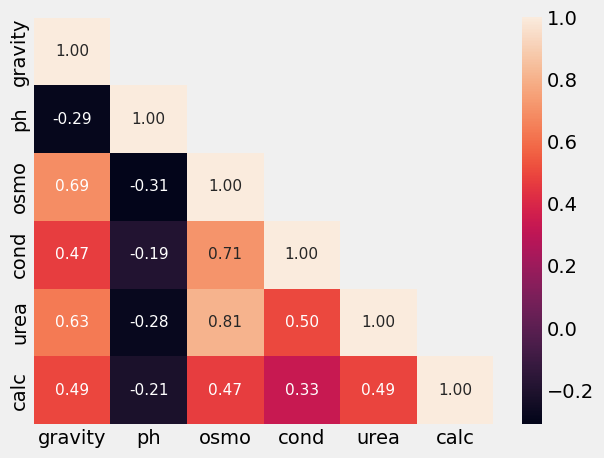

In [11]:
corr = train.iloc[:,1:-1].corr(method='pearson')
triu = np.triu(corr)
np.fill_diagonal(triu, False)
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size":11}, mask=triu);

In [12]:
X, y = train.iloc[:,1:-1], train.iloc[:,-1]

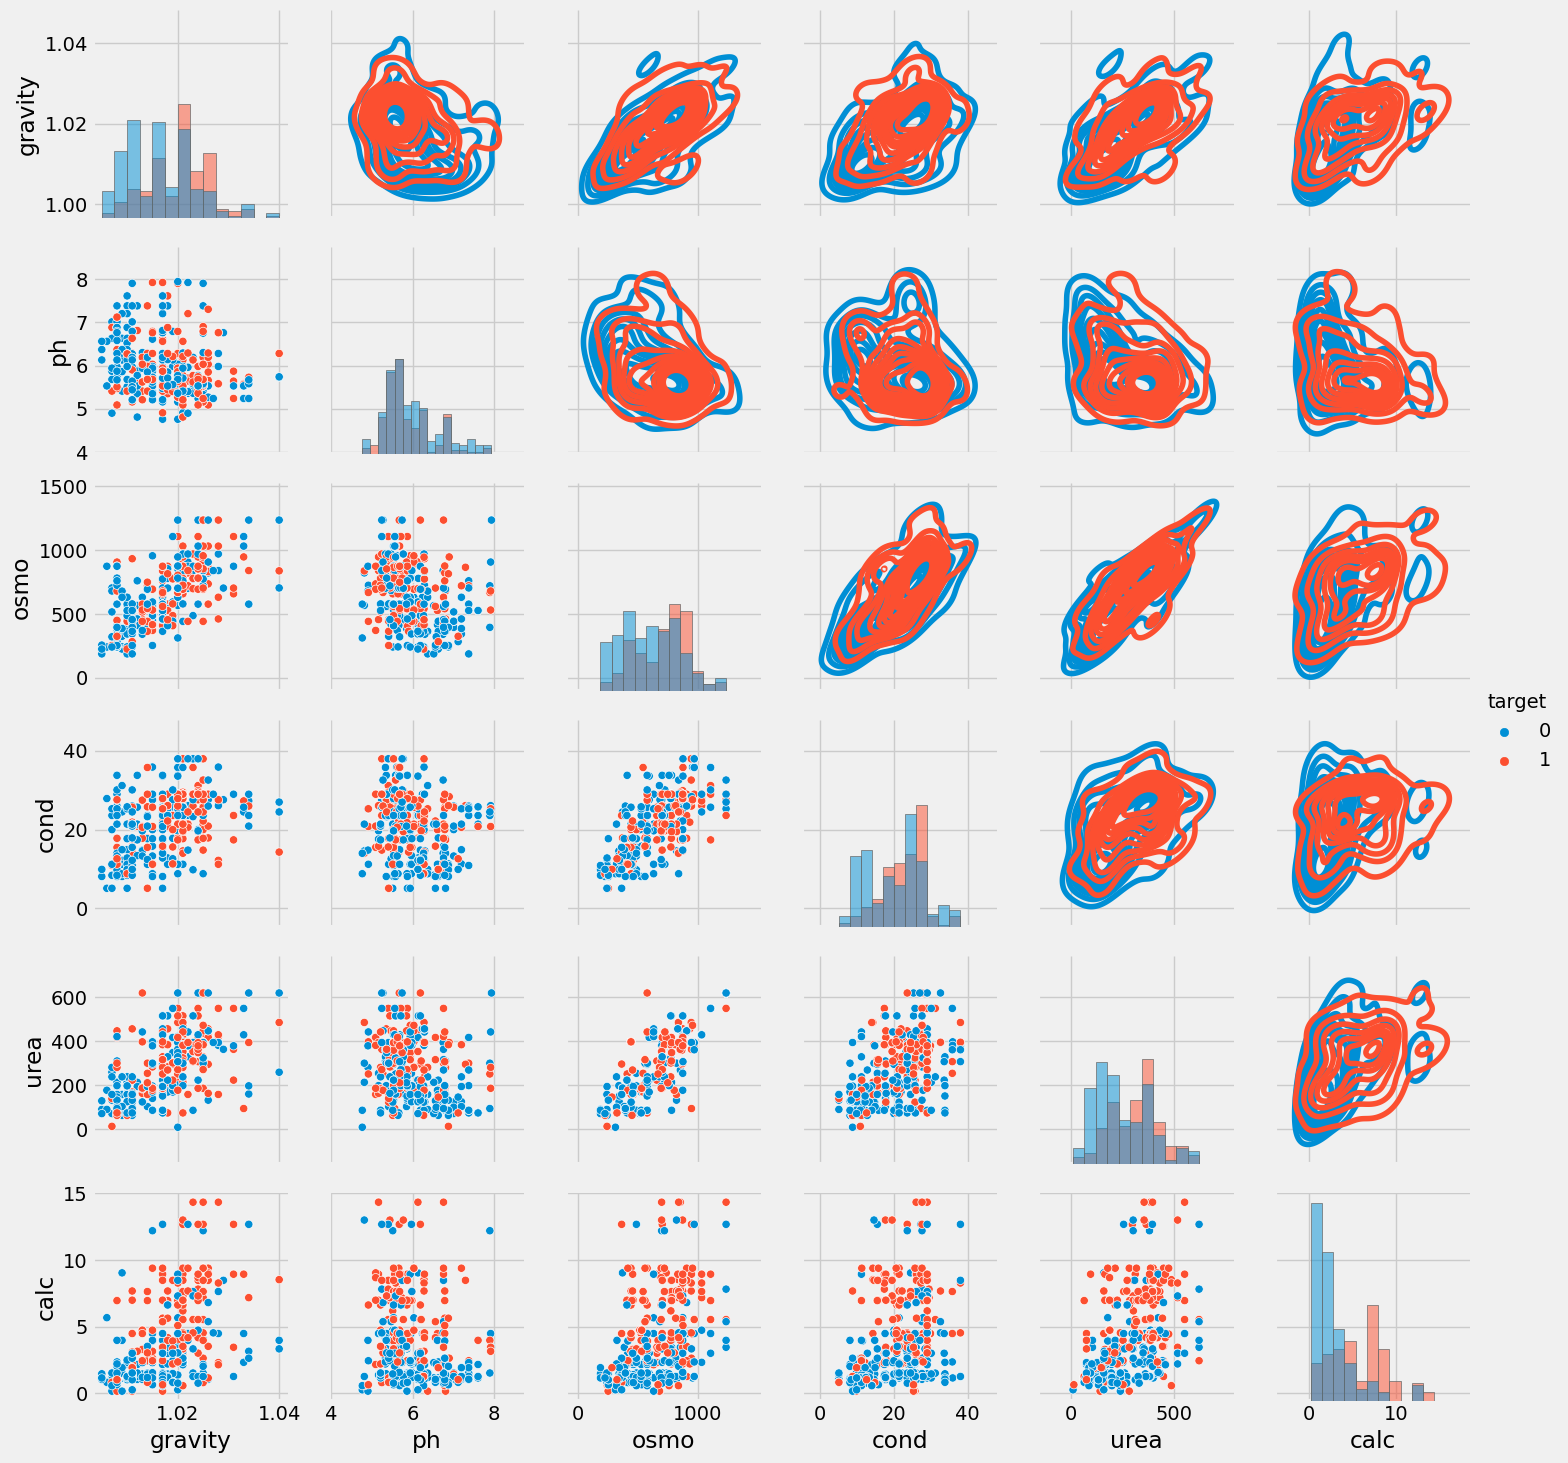

In [13]:
g = sns.PairGrid(train.iloc[:, 1:], hue='target')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.add_legend()

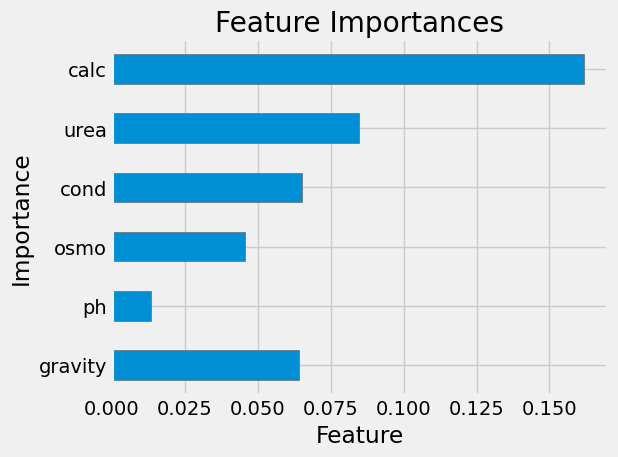

In [14]:
from sklearn.feature_selection import mutual_info_classif
features = X.columns
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, features[0:len(features)])
feat_importances.plot(kind='barh')

plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [15]:
X_test = test.iloc[:, 1:]

In [16]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [17]:
X_test.shape

(276, 6)

In [18]:
# cross-validation
splits=16

from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=rs)
fold = 1
for train_idx, valid_idx in skf.split(X, y):
    print(f'Fold {fold}: Train: {len(train_idx)}; Valid:{len(valid_idx)}')
    fold+=1

Fold 1: Train: 388; Valid:26
Fold 2: Train: 388; Valid:26
Fold 3: Train: 388; Valid:26
Fold 4: Train: 388; Valid:26
Fold 5: Train: 388; Valid:26
Fold 6: Train: 388; Valid:26
Fold 7: Train: 388; Valid:26
Fold 8: Train: 388; Valid:26
Fold 9: Train: 388; Valid:26
Fold 10: Train: 388; Valid:26
Fold 11: Train: 388; Valid:26
Fold 12: Train: 388; Valid:26
Fold 13: Train: 388; Valid:26
Fold 14: Train: 388; Valid:26
Fold 15: Train: 389; Valid:25
Fold 16: Train: 389; Valid:25


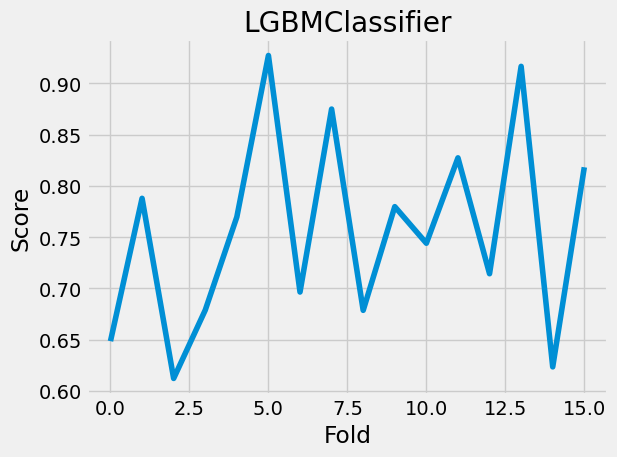

Avg. ROC AUC for LGBMClassifier: 0.756



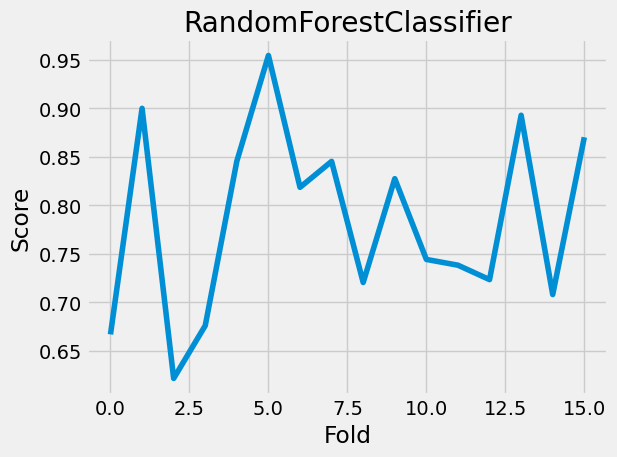

Avg. ROC AUC for RandomForestClassifier: 0.784



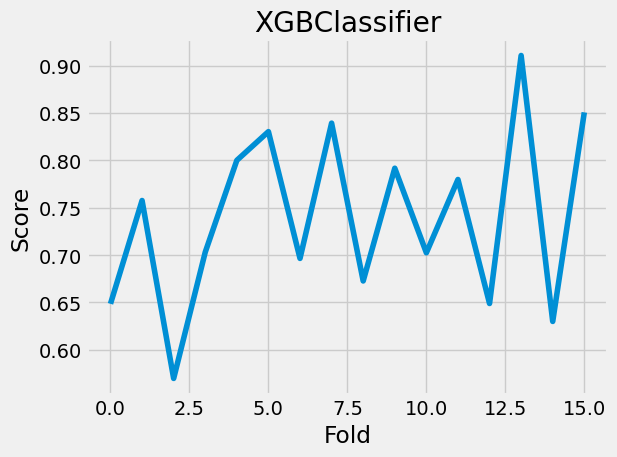

Avg. ROC AUC for XGBClassifier: 0.739



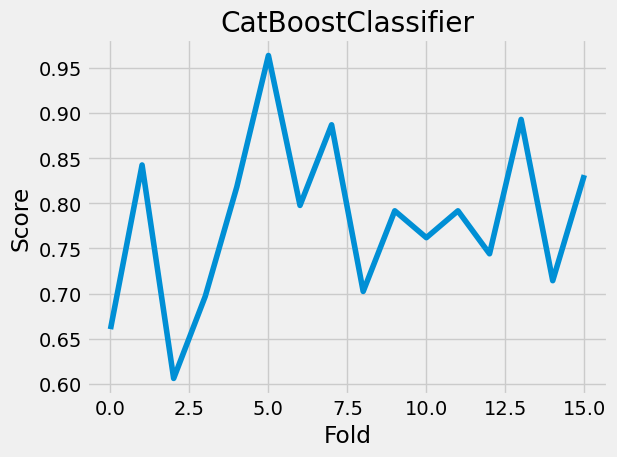

Avg. ROC AUC for CatBoostClassifier: 0.781



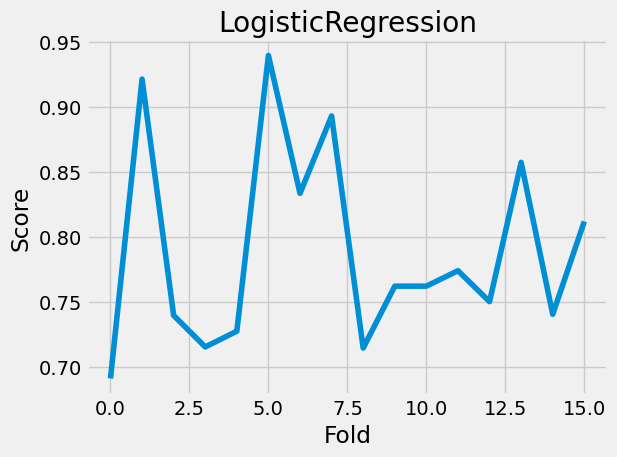

Avg. ROC AUC for LogisticRegression: 0.789



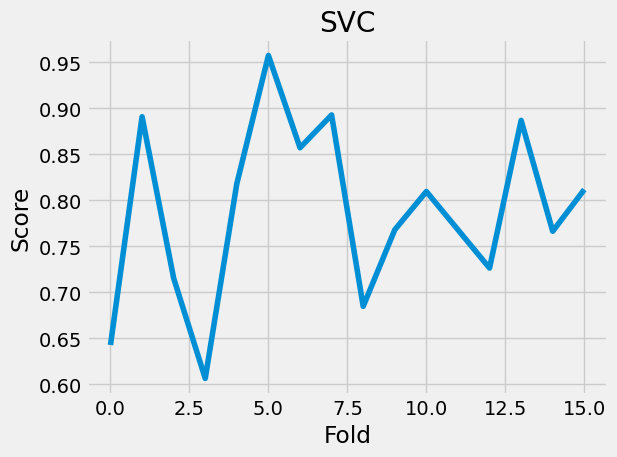

Avg. ROC AUC for SVC: 0.788



In [19]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# list of classifiers
classifiers = [LGBMClassifier(random_state=rs), RandomForestClassifier(random_state=rs),
               XGBClassifier(random_state=rs), CatBoostClassifier(random_state=rs, verbose=False),
               LogisticRegression(random_state=rs, multi_class='ovr'), SVC(random_state=rs, probability=True)]

# metrics and plotting
for clf in classifiers:
    score = cross_val_score(clf, X, y, cv=skf, scoring="roc_auc")
    title = clf.__class__.__name__
    sns.lineplot(data=score)
    plt.title(title)
    plt.xlabel("Fold")
    plt.ylabel("Score")
    plt.show()
    print(f'Avg. ROC AUC for {title}: {"{:.3f}".format(np.mean(score))}\n')